<a href="https://colab.research.google.com/github/ari97ag/Universidad/blob/main/Poverty2_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
poverty = pd.read_csv("POVERTY.txt",sep=";",header=0, index_col=3)
poverty.describe()

,Birth,Death,InfantDeath
count,97.000000,97.000000,97.000000
mean,29.229897,10.836082,54.901031
std,13.546695,4.647495,45.992584
min,9.700000,2.200000,4.500000
25%,14.500000,7.800000,13.100000
50%,29.000000,9.500000,43.000000
75%,42.200000,12.500000,83.000000
max,52.200000,25.000000,181.600000


In [7]:
%pip install pyclustering

     |████████████████████████████████| 2.6MB 8.8MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395106 sha256=e9457a511be4cad2a7aa11e138c831391dcbc1d58d95f8783fef3ac59fb8cdf0
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [17]:
#CLARA
from pyclustering.cluster.clarans import clarans
import numpy as np
from sklearn.preprocessing import scale
X=np.array(poverty)
X1=scale(X)
print(np.std(X1))

1.0


In [18]:
clarans_clus=clarans(X1,3,5,5)
clarans_clus.process()
clusters=clarans_clus.get_clusters()
print(clusters)
medoids=clarans_clus.get_medoids()
print(medoids)

[[0, 13, 14, 15, 16, 17, 18, 21, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 59, 61, 62, 65, 67, 68, 69, 70, 74, 88, 91], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 57, 60, 66], [12, 19, 22, 42, 44, 54, 55, 58, 63, 64, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96]]
[0, 40, 63]


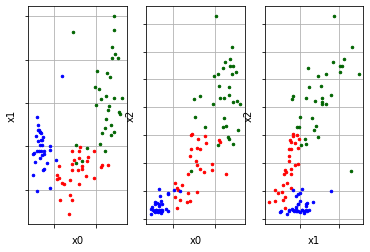

In [19]:
from pyclustering.cluster import cluster_visualizer_multidim
visualizer=cluster_visualizer_multidim()
visualizer.append_clusters(clusters,X.tolist())
visualizer.show()

In [ ]:
%pip install scikit-plot

In [23]:
from sklearn.metrics import silhouette_samples
import scikitplot as skplt
claraclust = np.zeros(np.shape(poverty)[0])
claraclust[clusters[1]]=1
claraclust[clusters[2]]=2
print(claraclust)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 2. 1. 0. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 2. 0. 1. 2. 0. 1. 0. 0. 2. 2. 0. 1. 0. 0. 0. 0. 2.
 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2.
 2.]


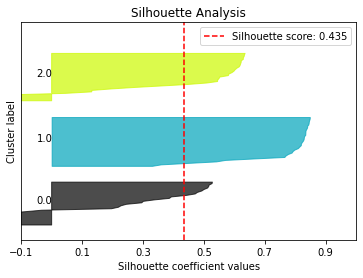

In [28]:
skplt.metrics.plot_silhouette(poverty, claraclust)

In [ ]:
#PAM

In [30]:
%pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp36-none-any.whl size=17087 sha256=7ed5a5467eb31250ff335c75c3fd4f640f190b84f4cf3fc32fb13205a1289cae
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


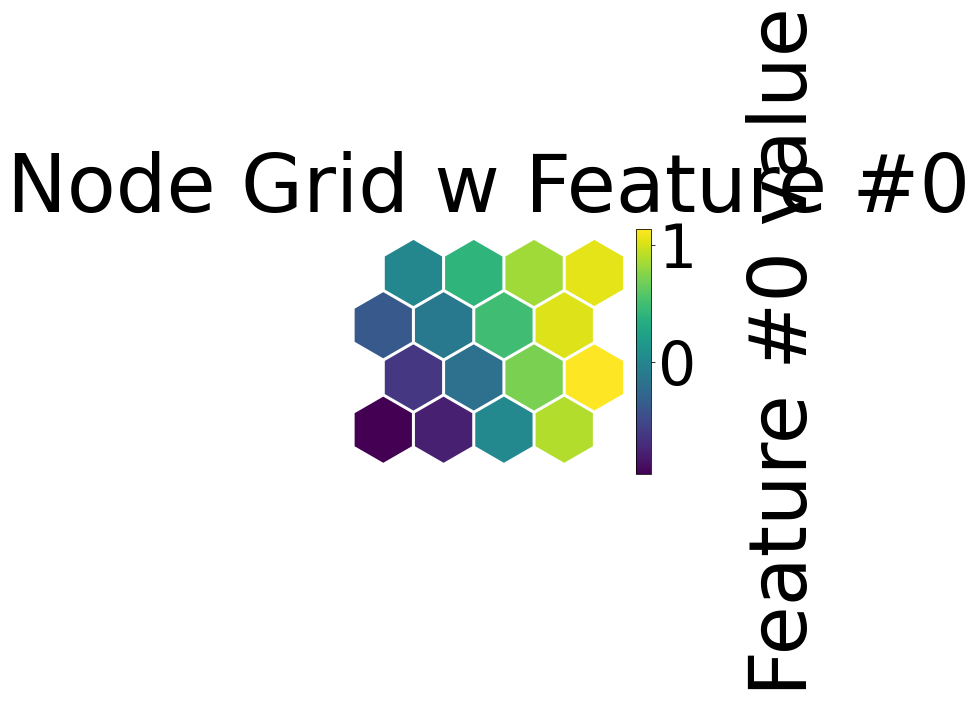

In [32]:
#SOM
import SimpSOM as sps
net=sps.somNet (4,4,X1,PBC=False)
net.train(startLearnRate =0.5, epochs =200)
net.nodes_graph(colnum=0)

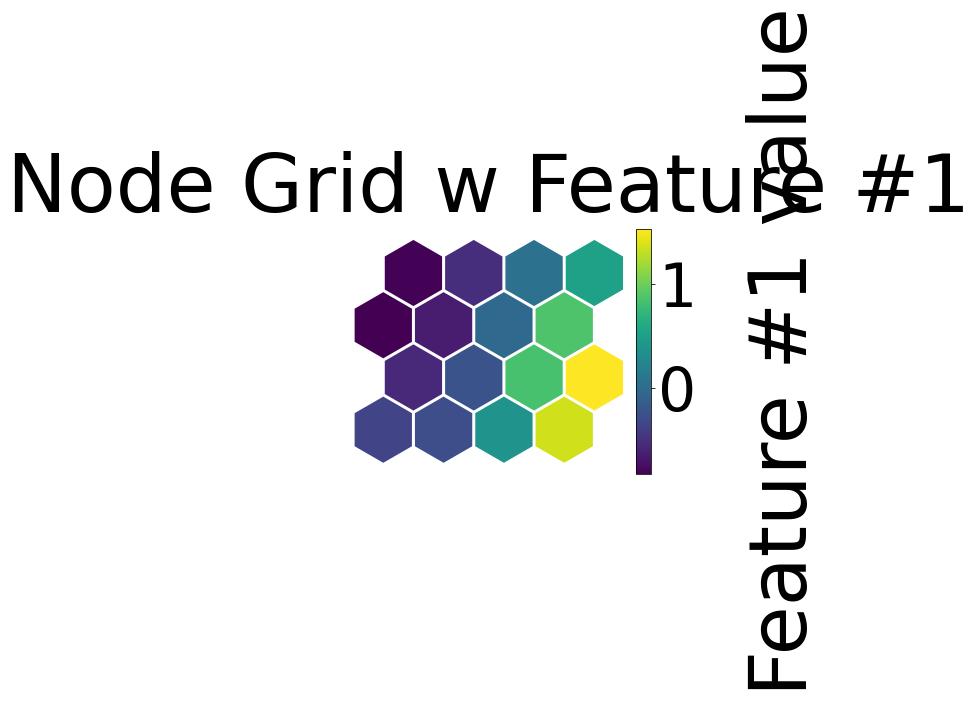

In [33]:
net.nodes_graph(colnum=1)

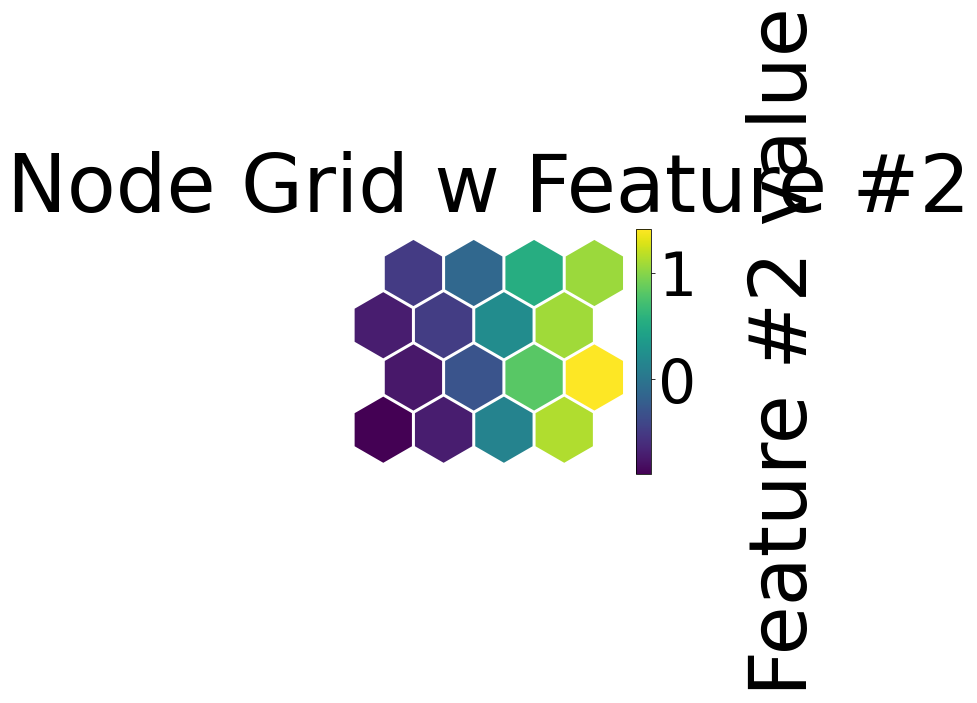

In [36]:
net.nodes_graph(colnum=2)

<Figure size 432x288 with 0 Axes>

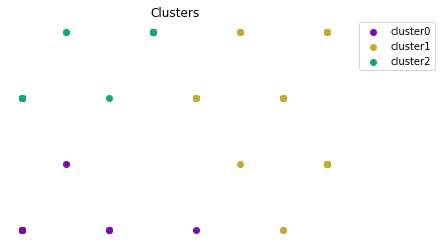

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 57, 60], [12, 19, 22, 42, 44, 54, 55, 58, 59, 62, 63, 64, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96], [0, 13, 14, 15, 16, 17, 18, 21, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 61, 65, 66, 67, 68, 70, 74, 91]]


<Figure size 432x288 with 0 Axes>

In [39]:
projection=net.project(X1)
cluster=net.cluster(X1,type="KMeans",numcl=3,show=True)
print(cluster)

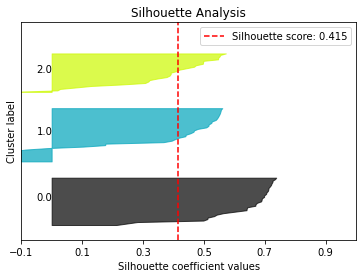

In [43]:
SOMclust = np.zeros(np.shape(poverty)[0])
SOMclust[cluster[1]]=1
SOMclust[cluster[2]]=2
skplt.metrics.plot_silhouette(X1, SOMclust)

In [52]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
db=DBSCAN (eps=0.5,min_samples=3).fit(X1)
labels=db.labels_
print(labels)

n_cluster=len(set(labels))-(1 if -1 in labels else 0)
n_noise= list(labels).count(-1)
print("El numero de clusters estimado es: %d" % n_cluster)
print("El numero de outliers es: %d" % n_noise)
print("Coeficiente de Silhouette: %0.3f" % silhouette_score(X1,labels))

[ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0
  0  0 -1  0  0  0  1  1  0  0  0  0 -1  0  0  1 -1  0  0  0  0  0  0  2
  0  3  0  2  1  2  3  0  0 -1  0  2  1  1  2  2  0  1  1  0  1  1  3  3
  0]
El numero de clusters estimado es: 4
El numero de outliers es: 8
Coeficiente de Silhouette: 0.310


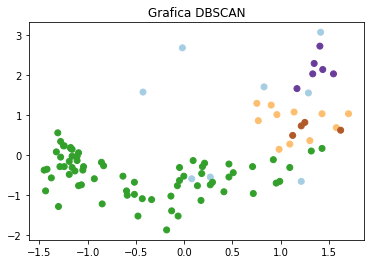

In [56]:
import matplotlib.pyplot as plt
ypred=db.fit_predict(X1)
plt.scatter(X1[:,0],X1[:,1],c=ypred,cmap="Paired")
plt.title("Grafica DBSCAN")
plt.show()

In [ ]:
space(1,10,10,dtype="int")
for i in rango:
  db1=DBSCAN(eps=0.3, min_samples=i).fit(X1)
  lalbels=db1.labels_
  silo=silhouette_score